Normalization main goal is to change the val of numeric col in the dataset to use a common scale, without distorting differences in ranges of values or losing information

- MinMax Scaling
- Mean Normalization
- Max absolute
- Robust scaling

# MinMax Scaling

Formula = (Xi-Xmin)/(Xmax-Xmin) 
lies b/w [0,1]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['Class label','Alcohol','Malic acid']
df

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

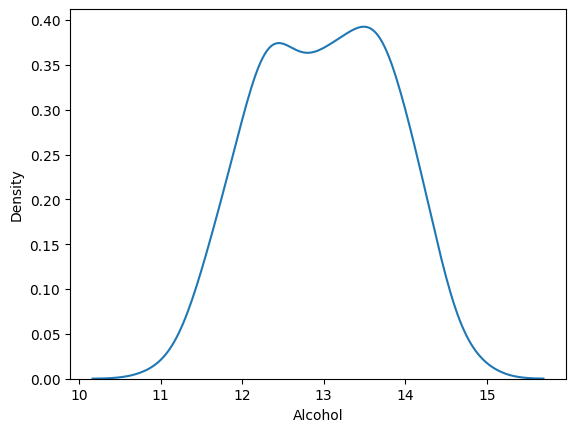

In [5]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic acid', ylabel='Density'>

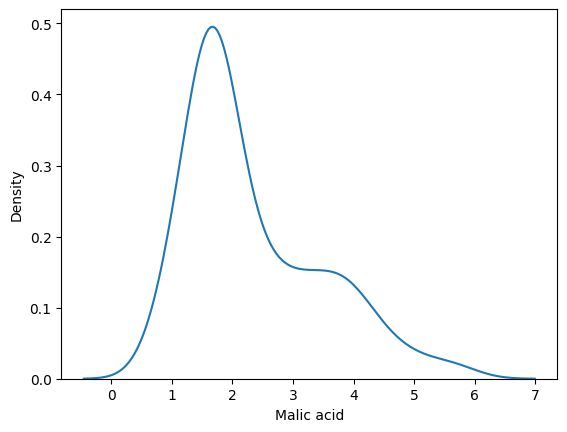

In [6]:
sns.kdeplot(df['Malic acid'])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

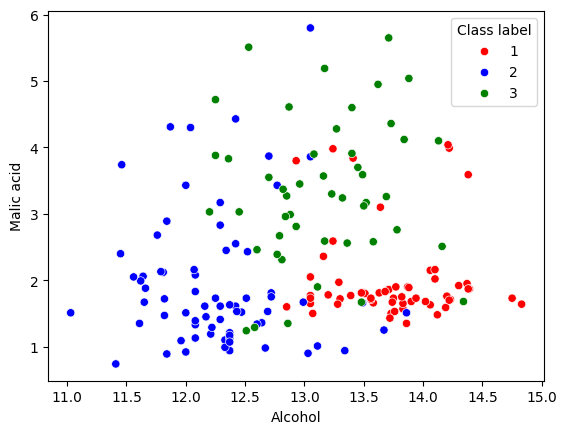

In [12]:
color_dict={1:'red',2:'blue',3:'green'}
sns.scatterplot(data=df,x=df['Alcohol'],y=df['Malic acid'],hue=df['Class label'],palette=color_dict)

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop('Class label',axis=1),
                                              df['Class label'],
                                              test_size=0.3,
                                              random_state=0)
X_train.shape, X_test.shape

((124, 2), (54, 2))

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
scaler.fit(X_train)

X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [20]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [23]:
np.round(X_train.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [24]:
np.round(X_train_scaled.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


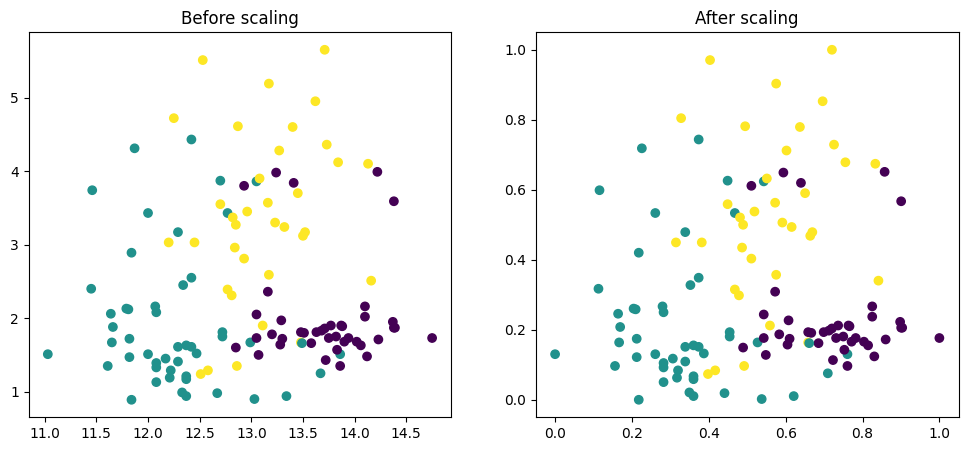

In [25]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title('Before scaling')
ax1.scatter(X_train['Alcohol'],X_train['Malic acid'],c=y_train)
ax2.set_title('After scaling')
ax2.scatter(X_train_scaled['Alcohol'],X_train_scaled['Malic acid'],c=y_train)
plt.show()

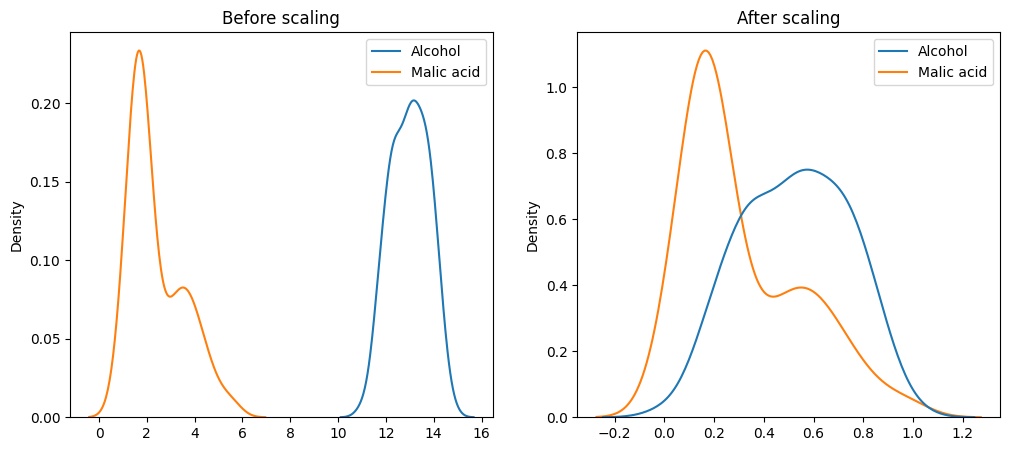

In [28]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title('Before scaling')
sns.kdeplot(X_train,ax=ax1)
ax2.set_title('After scaling')
sns.kdeplot(X_train_scaled,ax=ax2)
plt.show()

Outlier may get squished which can cause problem

# Mean Normalization

Formula = (Xi-Xmean)/(Xmax-Xmin) 
- lies b/w [-1,1]
- Rarely used
- Used when centered data is req, but there also Standardization is prefered

# MaxAbs Scaling

Formula = (Xi)/abs(Xmax)
- Used when sparse data (many 0s)

# Robust Scaling 

Formula = (Xi-median)/IQR
- used when lots of outliers

# Normalization vs Standardization

- Most of the time Standardization is used
- if min and max is already known use MinMax Scaler